In [4]:
# ---
# Title: Goodreads BigQuery Data Exploration
# Description: Inspect raw BigQuery data to understand schema, null patterns, and data distributions
# ---

from google.cloud import bigquery
import os

# -------------------------------------------------------------------
# 1. Connect to BigQuery
# -------------------------------------------------------------------
if os.path.exists("gcp_credentials.json"):
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "gcp_credentials.json"

client = bigquery.Client(project="recommendation-system-475301")
print("✅ Connected to BigQuery!")

✅ Connected to BigQuery!


In [5]:
# -------------------------------------------------------------------
# 2. Query sample data
# -------------------------------------------------------------------
QUERY = """
SELECT
  book_id,
  title,
  authors,
  average_rating,
  ratings_count,
  popular_shelves,
  description
FROM `recommendation-system-475301.books.goodreads_books_mystery_thriller_crime`
WHERE title IS NOT NULL
LIMIT 10000
"""

df = client.query(QUERY).to_dataframe()
print(f"✅ Retrieved {len(df)} rows and {len(df.columns)} columns")
df.head()

✅ Retrieved 10000 rows and 7 columns


,book_id,title,authors,average_rating,ratings_count,popular_shelves,description
0,25744824,"Pieces Of One, Part 1","[{'role': '', 'author_id': 8635673}]",4.65,14,"[{'name': 'to-read', 'count': 283}, {'name': '...","Two men want me and I want them. Simple, right..."
1,36225808,Preacher Man (DI Ted Darling #8),"[{'role': '', 'author_id': 13476159}]",4.48,226,"[{'name': 'currently-reading', 'count': 30}, {...",A teenager is found naked and wandering in a l...
2,20339311,Track Down Africa,"[{'role': '', 'author_id': 7709001}]",3.38,48,"[{'name': 'to-read', 'count': 50}, {'name': 'c...",
3,26094450,The Old House (Haunted Series Book 16),"[{'role': '', 'author_id': 5439921}]",4.56,178,"[{'name': 'to-read', 'count': 26}, {'name': 'c...",
4,26249939,Never Screw Up (Stockholm Noir Trilogy 2),"[{'role': '', 'author_id': 824407}]",3.30,3,"[{'name': 'to-read', 'count': 238}, {'name': '...",Jens Lapidus debutroman Snabba cash ar en av 2...


In [6]:
# -------------------------------------------------------------------
# 3. Quick info and summary
# -------------------------------------------------------------------
print("\n📊 Data Info:")
df.info()

print("\n🧮 Null Values:")
print(df.isna().sum())

print("\n📈 Numeric summary:")
display(df.describe())

print("\n📋 Column overview (robust):")
for col in df.columns:
    s = df[col]
    dtype = str(s.dtype)
    na = s.isna().sum()
    missing_pct = s.isna().mean() * 100

    # Handle unhashable types safely
    try:
        unique = s.nunique(dropna=True)
    except TypeError:
        unique = "unhashable"  # e.g., lists/dicts inside column

    print(f"{col:<25} | dtype: {dtype:15} | missing: {missing_pct:5.1f}% | uniques: {unique}")




📊 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   book_id          10000 non-null  Int64  
 1   title            10000 non-null  object 
 2   authors          10000 non-null  object 
 3   average_rating   10000 non-null  float64
 4   ratings_count    10000 non-null  Int64  
 5   popular_shelves  10000 non-null  object 
 6   description      10000 non-null  object 
dtypes: Int64(2), float64(1), object(4)
memory usage: 566.5+ KB

🧮 Null Values:
book_id            0
title              0
authors            0
average_rating     0
ratings_count      0
popular_shelves    0
description        0
dtype: int64

📈 Numeric summary:


,book_id,average_rating,ratings_count
count,10000.0,10000.000000,10000.0
mean,18248082.6496,3.877463,415.7404
std,11088729.60147,0.344889,2336.187652
min,205.0,1.000000,0.0
25%,8266747.5,3.680000,14.0
50%,19980689.5,3.880000,50.0
75%,27222382.75,4.090000,177.25
max,36469871.0,5.000000,81270.0



📋 Column overview (robust):
book_id                   | dtype: Int64           | missing:   0.0% | uniques: 10000
title                     | dtype: object          | missing:   0.0% | uniques: 9599
authors                   | dtype: object          | missing:   0.0% | uniques: unhashable
average_rating            | dtype: float64         | missing:   0.0% | uniques: 235
ratings_count             | dtype: Int64           | missing:   0.0% | uniques: 1353
popular_shelves           | dtype: object          | missing:   0.0% | uniques: unhashable
description               | dtype: object          | missing:   0.0% | uniques: 7367


In [7]:
# -------------------------------------------------------------------
# 4. Inspect example rows and JSON-like fields
# -------------------------------------------------------------------
print("\n🧩 Example rows:")
display(df.sample(5, random_state=42))

print("\n🔍 Example 'authors' field values:")
for val in df["authors"].dropna().head(5):
    print(val)

print("\n📚 Example 'popular_shelves' values:")
for val in df["popular_shelves"].dropna().head(3):
    print(val)



🧩 Example rows:


,book_id,title,authors,average_rating,ratings_count,popular_shelves,description
6252,18964799,3 for Murder Box Set (Jim Richards Murder Nove...,"[{'role': '', 'author_id': 3462789}]",3.91,22,"[{'name': 'to-read', 'count': 47}, {'name': 'c...",
4684,927525,The Stars' Tennis Balls,"[{'role': '', 'author_id': 10917}]",3.79,264,"[{'name': 'to-read', 'count': 897}, {'name': '...","10 hrs\nFor Ned, 1980 seems a blissful year. H..."
1731,34430429,"Pugs, Thugs, and Murder (Pet Shop Mysteries #6)","[{'role': '', 'author_id': 16214668}]",4.49,71,"[{'name': 'to-read', 'count': 22}, {'name': 'c...",Pet shop owner and hesitant novice investigato...
4742,31843828,A Deadly Affection (Dr. Genevieve Summerford M...,"[{'role': '', 'author_id': 5446103}]",3.80,135,"[{'name': 'to-read', 'count': 3390}, {'name': ...","""Do no harm"" is easier said than done...\nDr. ..."
4521,1665778,Vanish in an Instant,"[{'role': '', 'author_id': 8636}]",3.78,6,"[{'name': 'to-read', 'count': 62}, {'name': 'm...",



🔍 Example 'authors' field values:
[{'role': '', 'author_id': 8635673}]
[{'role': '', 'author_id': 13476159}]
[{'role': '', 'author_id': 7709001}]
[{'role': '', 'author_id': 5439921}]
[{'role': '', 'author_id': 824407}]

📚 Example 'popular_shelves' values:
[{'name': 'to-read', 'count': 283} {'name': 'dark', 'count': 5}
 {'name': 'kindle', 'count': 4} {'name': 'freebie', 'count': 2}
 {'name': 'contemporary-romance', 'count': 2}
 {'name': 'currently-reading', 'count': 2} {'name': 'romance', 'count': 2}
 {'name': 'want-to-read', 'count': 2}
 {'name': 'kindle-unlimited', 'count': 1}
 {'name': 'previewed-not-for-me', 'count': 1}
 {'name': 'owned-kindle', 'count': 1}
 {'name': 'erotic-suspense', 'count': 1}
 {'name': 'unread-on-kindle', 'count': 1}
 {'name': 'coming-soon', 'count': 1}
 {'name': 'owned-pending-kindle-free-ebook', 'count': 1}
 {'name': '5', 'count': 1} {'name': 'complete-series', 'count': 1}
 {'name': 'd-t-h', 'count': 1}
 {'name': 'ahh-bliss-of-mentally-ill', 'count': 1}
 {'n

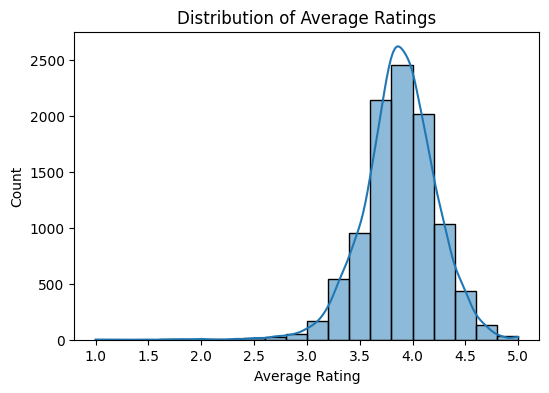

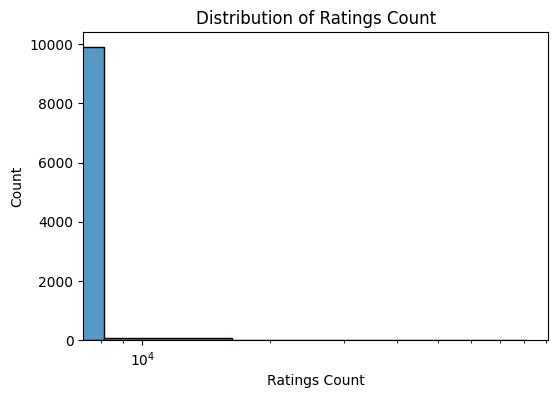

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# -------------------------------------------------------------------
# 5. Rating Distributions
# -------------------------------------------------------------------
plt.figure(figsize=(6,4))
sns.histplot(df["average_rating"].dropna(), bins=20, kde=True)
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["ratings_count"].dropna(), bins=10)
plt.title("Distribution of Ratings Count")
plt.xlabel("Ratings Count")
plt.ylabel("Count")
plt.xscale("log")
plt.show()


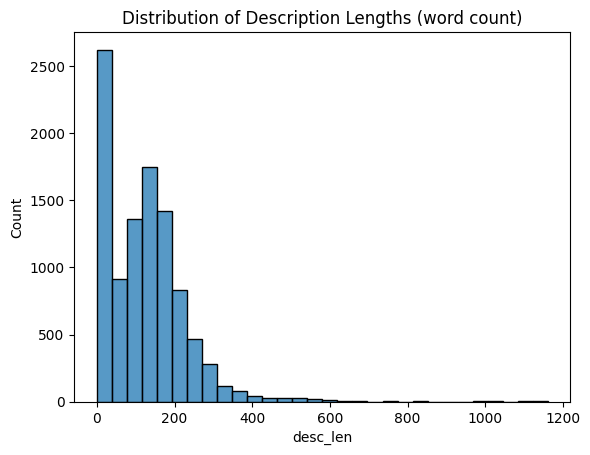

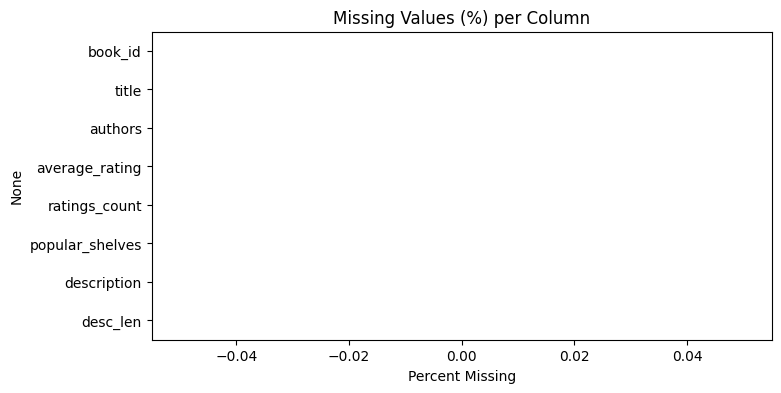

In [9]:
# -------------------------------------------------------------------
# 6. Text length and missingness
# -------------------------------------------------------------------
if "description" in df.columns:
    df["desc_len"] = df["description"].fillna("").apply(lambda x: len(str(x).split()))
    sns.histplot(df["desc_len"], bins=30)
    plt.title("Distribution of Description Lengths (word count)")
    plt.show()

# Percentage of missing values
missing_pct = df.isna().mean().sort_values(ascending=False) * 100
plt.figure(figsize=(8,4))
sns.barplot(x=missing_pct, y=missing_pct.index)
plt.title("Missing Values (%) per Column")
plt.xlabel("Percent Missing")
plt.show()


In [10]:
from pathlib import Path
# -------------------------------------------------------------------
# 7. Save a local sample for offline dev/testing
# -------------------------------------------------------------------
Path("../raw").mkdir(parents=True, exist_ok=True)
out_path = "../raw/goodreads_sample.csv"
df.to_csv(out_path, index=False)
print(f"💾 Saved sample data to {out_path}")


💾 Saved sample data to ../raw/goodreads_sample.csv
